<a href="https://colab.research.google.com/github/leosanron/wordcloud/blob/main/Copia_de_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Palabras claves.xlsx to Palabras claves (1).xlsx


## Analisis

#Librerias

In [ ]:
import pandas as pd
import nltk, re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_excel('Palabras claves.xlsx')

In [ ]:
dataset = dataset.drop_duplicates()
corpus = dataset.values.ravel().tolist()


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocessing(doc):
    wpt=nltk.WordPunctTokenizer()
    stop_words=nltk.corpus.stopwords.words('english')
    # Se eliminan caracteres especiales
    doc=re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # Se convierten los téxtos a minúsculas
    doc=doc.lower()
    doc.strip("\n")
    # Se separan signos de puntuación
    tokens=wpt.tokenize(doc)
    # Se eliminan las stopwords
    tokens=[token for token in tokens if token not in stop_words and len(token)>2]
    # Retornamos una versión filtrada del texto
    return ' '.join(tokens)


In [ ]:
norm_corpus=list(map(preprocessing,corpus))

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 10.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:
corpus_wc = ' '.join([a for a in norm_corpus])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      max_words=30,
                      #width=1500,
                      #height=1500,
                      #color_func=random_color_func
                      ).generate(corpus_wc)



In [ ]:
#Pruebas 
type(corpus_wc)
print(corpus_wc)


biodiversity offsetting increasingly used mitigate biodiversity impacts development practice offsetting rarely considers also mitigate losses ecosystem services offset rules near offset must impact site may help ensure biodiversity offsets also counterbalance losses ecosystem services yet well understood explored different rules siting coastal offsets could change net impacts provisioning ecosystem service fishery resources queensland australia spatially explicit model incorporating supply flow demand fishery resources developed simulate contributions offset sites commercial fisheries queensland australia simulated offsets losses due real projects damaged mangroves projects damaging seagrasses found percentage species suffering net negative outcomes whole commercial fishery increased offsets located close impact sites restrictions offset location fisheries seagrass offsets suffered net economic losses scenarios worse offsets required near impact sites offsetting outcomes varied substan

In [ ]:
# Display the generated image:
def imprimir_nube():
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


In [ ]:
# Modelado de temas 

# Lo limitamos a un vocabulario de tamaño 1000
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('english'), max_features=1000, max_df=0.5, sublinear_tf=True)
tfidf.fit(norm_corpus)
X_tfidf = tfidf.transform(norm_corpus).toarray()
print("La representación TF-IDF es de tamaño: {}".format(X_tfidf.shape))


from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=0)
svd_model.fit(X_tfidf)


terms = tfidf.get_feature_names()

def analisis_topicos():
  for i, comp in enumerate(svd_model.components_):
      # Juntamos los términos con cada uno de los valores en la matriz V
      terms_comp=zip(terms, comp)
      # Ordenamos los términos de acuerdo al resultado de LSA
      sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
      # Mostramos los términos más importantes en cada tópico
      print("Tópico {}: {}".format(i," ".join(list(map(lambda x:x[0], sorted_terms)))))


La representación TF-IDF es de tamaño: (142, 1000)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Resultados

Tópico 0: offsetting environmental net impacts mitigation ecological policies habitat nnl ecosystem economic projects implementation losses however
Tópico 1: market markets institutional services mechanisms nature banking pes new instruments political marketbased regulations arrangements paper
Tópico 2: nnl marine mitigation hierarchy projects practice application principles france impacts environment implementation infrastructure countries concerning
Tópico 3: metrics species program habitat banking planning landscape results quality compared practices accounting mitigation analysis ratios
Tópico 4: marine australia offsetting environment environments application vegetation terrestrial likely differences principles outcomes located found environmental
Tópico 5: marine ecosystem services ecosystems restoration service impacts coastal terrestrial range spatial used markets environment environments
Tópico 6: hierarchy way incentives mitigation convention targets commitments international

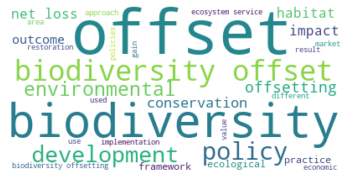

In [ ]:
analisis_topicos()
print("__________________________________________")
print("WORD_CLOUD")
imprimir_nube()